# Imports

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import EditedNearestNeighbours
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
%matplotlib inline

# Data Summary

In [2]:
train=pd.read_csv('../input/insurance-claim-prediction/train_qWM28Yl.csv')
test=pd.read_csv('../input/insurance-claim-prediction/test_zo1G9sv.csv')

In [3]:
train.shape

(58592, 44)

In [4]:
train.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   area_cluster                      58592 non-null  object 
 5   population_density                58592 non-null  int64  
 6   make                              58592 non-null  int64  
 7   segment                           58592 non-null  object 
 8   model                             58592 non-null  object 
 9   fuel_type                         58592 non-null  object 
 10  max_torque                        58592 non-null  object 
 11  max_power                         58592 non-null  object 
 12  engi

In [6]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
policy_tenure,58592.0,0.611246,0.414156,0.002735,0.210250,0.573792,1.039104,1.396641
age_of_car,58592.0,0.069424,0.056721,0.000000,0.020000,0.060000,0.110000,1.000000
age_of_policyholder,58592.0,0.469420,0.122886,0.288462,0.365385,0.451923,0.548077,1.000000
population_density,58592.0,18826.858667,17660.174792,290.000000,6112.000000,8794.000000,27003.000000,73430.000000
make,58592.0,1.763722,1.136988,1.000000,1.000000,1.000000,3.000000,5.000000
airbags,58592.0,3.137066,1.832641,1.000000,2.000000,2.000000,6.000000,6.000000
displacement,58592.0,1162.355851,266.304786,796.000000,796.000000,1197.000000,1493.000000,1498.000000
cylinder,58592.0,3.626963,0.483616,3.000000,3.000000,4.000000,4.000000,4.000000
gear_box,58592.0,5.245443,0.430353,5.000000,5.000000,5.000000,5.000000,6.000000
turning_radius,58592.0,4.852893,0.228061,4.500000,4.600000,4.800000,5.000000,5.200000


In [7]:
train.describe(include='object').T

,count,unique,top,freq
policy_id,58592,58592,ID00001,1
area_cluster,58592,22,C8,13654
segment,58592,6,B2,18314
model,58592,11,M1,14948
fuel_type,58592,3,Petrol,20532
max_torque,58592,9,113Nm@4400rpm,17796
max_power,58592,9,88.50bhp@6000rpm,17796
engine_type,58592,11,F8D Petrol Engine,14948
is_esc,58592,2,No,40191
is_adjustable_steering,58592,2,Yes,35526


In [8]:
train.isnull().sum().any()

False

In [9]:
train.duplicated().any()

False

In [10]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize']=(12,8)

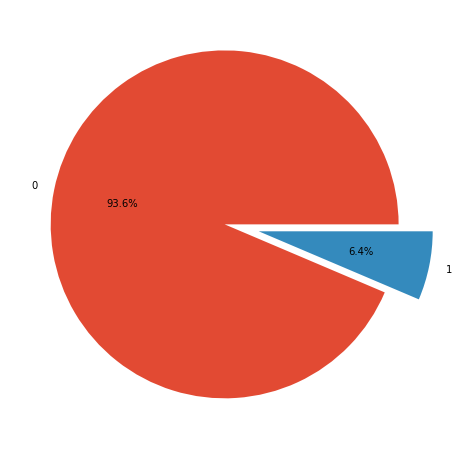

In [11]:
inter=train['is_claim'].value_counts()
plt.pie(inter,labels=inter.index,autopct='%0.1f%%',explode=[0.0,0.2]);

# Data Preprocessing

In [12]:
X_train=train.drop(['policy_id','is_claim'],axis=1)
X_test=test.drop(['policy_id'],axis=1)
y_train=train['is_claim']

encode=LabelEncoder()
y_train=encode.fit_transform(y_train)

In [13]:
numeric_col=X_train.select_dtypes(exclude='object').columns
numeric_col

Index(['policy_tenure', 'age_of_car', 'age_of_policyholder',
       'population_density', 'make', 'airbags', 'displacement', 'cylinder',
       'gear_box', 'turning_radius', 'length', 'width', 'height',
       'gross_weight', 'ncap_rating'],
      dtype='object')

In [14]:
categorical_col=X_train.select_dtypes(include='object').columns

# low cardinality categorical columns
categorical_col_low=[i for i in categorical_col if train[i].nunique()<=10]

# high cardinality categorical columns
categorical_col_high=[i for i in categorical_col if train[i].nunique()>10]

print(f'Low cardinality categorical columns:\n\n {categorical_col_low}')
print(f'\nHigh cardinality categorical columns:\n\n {categorical_col_high}')

Low cardinality categorical columns:

 ['segment', 'fuel_type', 'max_torque', 'max_power', 'is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors', 'is_parking_camera', 'rear_brakes_type', 'transmission_type', 'steering_type', 'is_front_fog_lights', 'is_rear_window_wiper', 'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks', 'is_central_locking', 'is_power_steering', 'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror', 'is_ecw', 'is_speed_alert']

High cardinality categorical columns:

 ['area_cluster', 'model', 'engine_type']


In [15]:
pipeline=make_pipeline(MinMaxScaler(),PowerTransformer())

transformers=[('st',pipeline,numeric_col),
              ('or',OrdinalEncoder(),categorical_col_high),
              ('oh',OneHotEncoder(),categorical_col_low )]

transform=ColumnTransformer(transformers)
transform.fit(X_train)

X_train=transform.transform(X_train)
X_test=transform.transform(X_test)

# Evalution Procedure

In [16]:
def evaluate(X,y):
    
    models,names=get_models()
    results=[]
    
    for i in range(len(models)):
        cv=StratifiedKFold(n_splits=5)
        metric=make_scorer(f1_score)
        scores=cross_val_score(models[i],X,y,scoring=metric,cv=cv)
        
        results.append(scores)
        
    plt.boxplot(results,labels=names,showmeans=True);

# Algorithm Spot Checking

In [17]:
def get_models():
    
    models=[]
    names=[]
    
    models.append(LogisticRegression())
    names.append('lr')               
                  
    models.append(RandomForestClassifier())
    names.append('rf')
    
    models.append(XGBClassifier())
    names.append('xgb')
    
    models.append(LGBMClassifier())
    names.append('lgb')
    
    return models,names

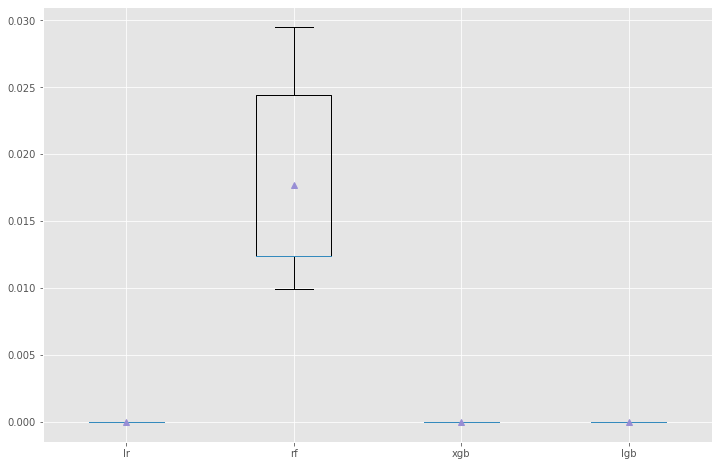

In [18]:
evaluate(X_train,y_train)

# Cost Sensitive Learning

In [19]:
from collections import Counter
counter = Counter(y_train)
estimate = counter[0] / counter[1]
estimate

14.632870864461045

In [20]:
def get_models():
    
    models=[]
    names=[]
    
    models.append(LogisticRegression(class_weight='balanced'))
    names.append('lr')               
                  
    models.append(RandomForestClassifier(class_weight='balanced_subsample'))
    names.append('rf')
    
    models.append(XGBClassifier(scale_pos_weight=estimate))
    names.append('xgb')
    
    models.append(LGBMClassifier(class_weight='balanced'))
    names.append('lgb')
    
    return models,names

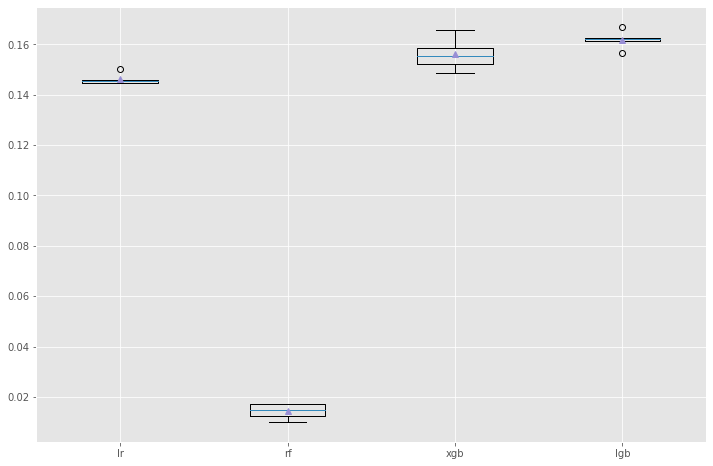

In [21]:
evaluate(X_train,y_train)

# Data Sampling

In [22]:
resample=EditedNearestNeighbours()
X_rs,y_rs=resample.fit_resample(X_train,y_train)

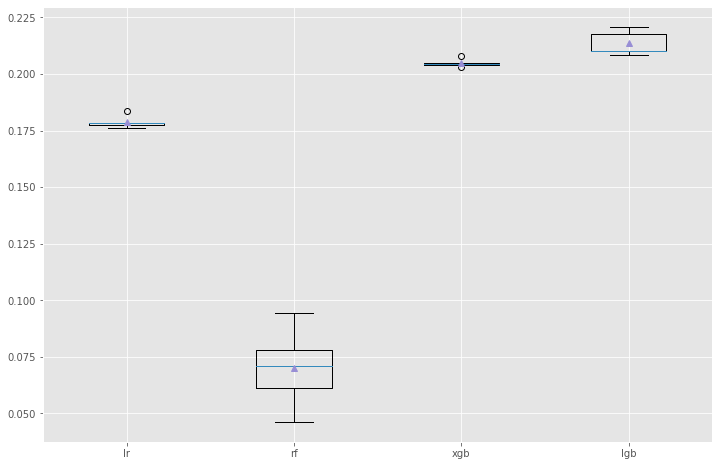

In [23]:
evaluate(X_rs,y_rs)

**Data smapling with combination of smote and edited nearest neighbor has substantially increased the model performance,therefore we will use it. LightGBM has performed best therefore we will use it.**

In [24]:
X_train,y_train=X_rs,y_rs

# Feature Selection

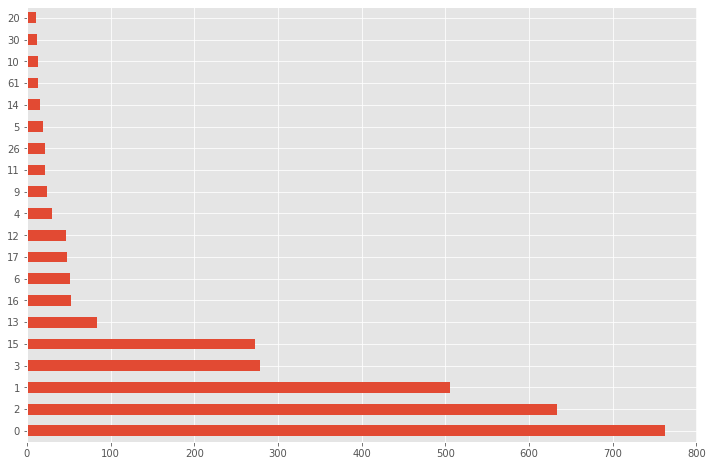

In [25]:
model=LGBMClassifier(class_weight='balanced',random_state=1)
model.fit(X_train,y_train)

fi=pd.Series(model.feature_importances_).sort_values(ascending=False).head(20)
fi.plot(kind='barh');

**Only few variable are important fot prediction**

In [26]:
col=fi.index
col=col.to_list()

In [27]:
results=[]

for i in range(15,30):
    model=LGBMClassifier(class_weight='balanced',random_state=1)
    cv=StratifiedKFold(n_splits=5)
    metric=make_scorer(f1_score)
    scores=cross_val_score(model,X_train[:,col[:i]],y_train,scoring=metric,cv=cv)
    results.append(scores)

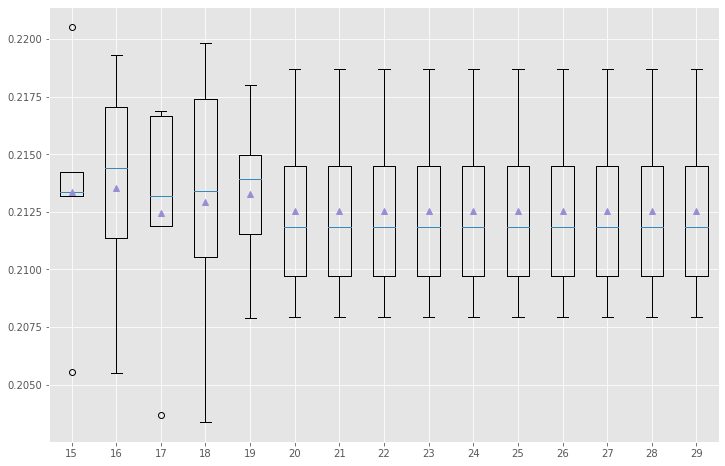

In [28]:
labels=[i for i in range(15,30)]
plt.boxplot(results,labels=labels,showmeans=True);

**Model performance increases till 19 features then becomes stagnant, therefore we will use 19 features.**

In [29]:
X_train=X_train[:,col[:19]]
X_test=X_test[:,col[:19]]

# Hyperparameter Optimization

In [30]:
from sklearn.model_selection import GridSearchCV

In [31]:
param_grid={'n_estimators':range(100,180,10),
            'max_depth':range(6,15),
            'learning_rate':np.linspace(0.01, 0.1, num=10)}
    
model=LGBMClassifier(class_weight='balanced',random_state=1)
cv=StratifiedKFold(n_splits=5)
metric=make_scorer(f1_score)

grid=GridSearchCV(model,param_grid,cv=cv,scoring=metric,n_jobs=-1)
grid.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LGBMClassifier(class_weight='balanced', random_state=1),
             n_jobs=-1,
             param_grid={'learning_rate': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ]),
                         'max_depth': range(6, 15),
                         'n_estimators': range(100, 180, 10)},
             scoring=make_scorer(f1_score))

In [32]:
grid.best_params_

{'learning_rate': 0.09000000000000001, 'max_depth': 8, 'n_estimators': 160}

In [33]:
grid.best_score_

0.2169683367507084

# Solution

In [34]:
model=grid.best_estimator_
y_pred=model.predict(X_test)

In [35]:
sol=pd.DataFrame({'policy_id':test['policy_id'],
                  'is_claim':y_pred})

sol.to_csv('submission.csv',index=False)